# Regression - FFNN - one_hot + normalize

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
scaler = StandardScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [11]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

## Build Model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [28]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [29]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 238us/sample - loss: 77.0728 - mae: 7.9832 - coeff: -6.7306 - val_loss: 41.4353 - val_mae: 5.4801 - val_coeff: -2.8360
Epoch 2/100
3341/3341 [==============================] - 0s 58us/sample - loss: 27.5002 - mae: 4.1384 - coeff: -1.7027 - val_loss: 19.2556 - val_mae: 3.4196 - val_coeff: -0.7407
Epoch 3/100
3341/3341 [==============================] - 0s 99us/sample - loss: 14.1125 - mae: 2.7243 - coeff: -0.3692 - val_loss: 9.5465 - val_mae: 2.1910 - val_coeff: 0.1471
Epoch 4/100
3341/3341 [==============================] - 0s 67us/sample - loss: 7.7304 - mae: 1.8936 - coeff: 0.2438 - val_loss: 6.2491 - val_mae: 1.7970 - val_coeff: 0.4409
Epoch 5/100
3341/3341 [==============================] - 0s 58us/sample - loss: 6.1573 - mae: 1.7024 - coeff: 0.3963 - val_loss: 5.7047 - val_mae: 1.6844 - val_coeff: 0.4859
Epoch 6/100
3341/3341 [==============================] - 0s 63us/sample 

3341/3341 [==============================] - 0s 45us/sample - loss: 4.1310 - mae: 1.4392 - coeff: 0.5934 - val_loss: 4.6007 - val_mae: 1.4979 - val_coeff: 0.5854
Epoch 48/100
3341/3341 [==============================] - 0s 42us/sample - loss: 4.1083 - mae: 1.4345 - coeff: 0.5926 - val_loss: 4.5786 - val_mae: 1.5186 - val_coeff: 0.5870
Epoch 49/100
3341/3341 [==============================] - 0s 39us/sample - loss: 4.1372 - mae: 1.4414 - coeff: 0.5882 - val_loss: 4.5755 - val_mae: 1.5118 - val_coeff: 0.5869
Epoch 50/100
3341/3341 [==============================] - 0s 41us/sample - loss: 4.1133 - mae: 1.4431 - coeff: 0.5951 - val_loss: 4.5693 - val_mae: 1.4972 - val_coeff: 0.5876
Epoch 51/100
3341/3341 [==============================] - 0s 55us/sample - loss: 4.1378 - mae: 1.4523 - coeff: 0.5738 - val_loss: 4.6555 - val_mae: 1.5688 - val_coeff: 0.5790
Epoch 52/100
3341/3341 [==============================] - 0s 42us/sample - loss: 4.1566 - mae: 1.4556 - coeff: 0.5895 - val_loss: 4.5931 -

3341/3341 [==============================] - 0s 59us/sample - loss: 3.9650 - mae: 1.4190 - coeff: 0.5983 - val_loss: 4.6702 - val_mae: 1.4925 - val_coeff: 0.5792
Epoch 94/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.9153 - mae: 1.4085 - coeff: 0.6050 - val_loss: 4.7274 - val_mae: 1.5051 - val_coeff: 0.5745
Epoch 95/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.8956 - mae: 1.4076 - coeff: 0.6136 - val_loss: 4.6690 - val_mae: 1.4972 - val_coeff: 0.5798
Epoch 96/100
3341/3341 [==============================] - 0s 50us/sample - loss: 3.9487 - mae: 1.4217 - coeff: 0.6128 - val_loss: 4.7477 - val_mae: 1.5002 - val_coeff: 0.5731
Epoch 97/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.8845 - mae: 1.4072 - coeff: 0.6143 - val_loss: 4.5541 - val_mae: 1.5298 - val_coeff: 0.5874
Epoch 98/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.0051 - mae: 1.4290 - coeff: 0.6094 - val_loss: 4.7072 -

In [32]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [33]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.661218985064871
RMSE :      2.158985637994119
r2_score :  0.5846229216961838


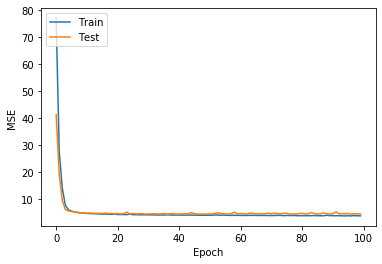

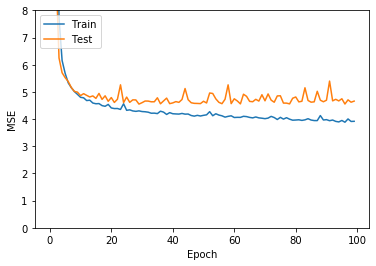

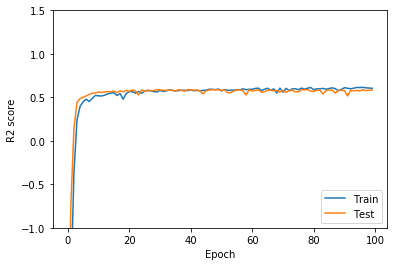

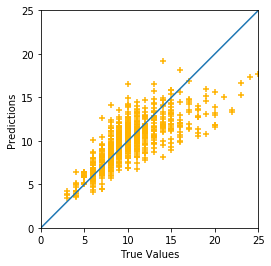

In [34]:
s

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 1 L2 regularization 0.1

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(1))

In [14]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 0s 76us/sample - loss: 5.8863 - mae: 1.4991 - coeff: 0.5550 - val_loss: 6.0313 - val_mae: 1.5545 - val_coeff: 0.5825
Epoch 2/100
3341/3341 [==============================] - 0s 51us/sample - loss: 5.8145 - mae: 1.5023 - coeff: 0.5658 - val_loss: 6.2461 - val_mae: 1.5216 - val_coeff: 0.5611
Epoch 3/100
3341/3341 [==============================] - 0s 50us/sample - loss: 5.7856 - mae: 1.4876 - coeff: 0.5683 - val_loss: 6.0485 - val_mae: 1.5248 - val_coeff: 0.5761
Epoch 4/100
3341/3341 [==============================] - 0s 72us/sample - loss: 5.7540 - mae: 1.5045 - coeff: 0.5585 - val_loss: 6.0517 - val_mae: 1.5144 - val_coeff: 0.5737
Epoch 5/100
3341/3341 [==============================] - 0s 66us/sample - loss: 5.7193 - mae: 1.4953 - coeff: 0.5580 - val_loss: 5.9887 - val_mae: 1.5135 - val_coeff: 0.5775
Epoch 6/100
3341/3341 [==============================] - 0s 96us/sample - loss: 5.6

3341/3341 [==============================] - 0s 72us/sample - loss: 5.1872 - mae: 1.4899 - coeff: 0.5638 - val_loss: 5.6611 - val_mae: 1.5070 - val_coeff: 0.5637
Epoch 48/100
3341/3341 [==============================] - 0s 57us/sample - loss: 5.1559 - mae: 1.4832 - coeff: 0.5721 - val_loss: 5.4196 - val_mae: 1.5410 - val_coeff: 0.5838
Epoch 49/100
3341/3341 [==============================] - 0s 52us/sample - loss: 5.1539 - mae: 1.4910 - coeff: 0.5733 - val_loss: 5.5578 - val_mae: 1.4997 - val_coeff: 0.5722
Epoch 50/100
3341/3341 [==============================] - 0s 61us/sample - loss: 5.1463 - mae: 1.4763 - coeff: 0.5714 - val_loss: 5.3683 - val_mae: 1.5146 - val_coeff: 0.5880
Epoch 51/100
3341/3341 [==============================] - 0s 51us/sample - loss: 5.1543 - mae: 1.4952 - coeff: 0.5719 - val_loss: 5.9728 - val_mae: 1.5490 - val_coeff: 0.5338
Epoch 52/100
3341/3341 [==============================] - 0s 54us/sample - loss: 5.1766 - mae: 1.4763 - coeff: 0.5668 - val_loss: 5.5255 -

Epoch 94/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.9514 - mae: 1.4683 - coeff: 0.5689 - val_loss: 5.5415 - val_mae: 1.5098 - val_coeff: 0.5618
Epoch 95/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.9590 - mae: 1.4671 - coeff: 0.5566 - val_loss: 5.3505 - val_mae: 1.5106 - val_coeff: 0.5783
Epoch 96/100
3341/3341 [==============================] - 0s 48us/sample - loss: 5.1032 - mae: 1.4933 - coeff: 0.5559 - val_loss: 5.5473 - val_mae: 1.5184 - val_coeff: 0.5608
Epoch 97/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.9479 - mae: 1.4730 - coeff: 0.5766 - val_loss: 5.2954 - val_mae: 1.5143 - val_coeff: 0.5830
Epoch 98/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.9264 - mae: 1.4655 - coeff: 0.5757 - val_loss: 5.2290 - val_mae: 1.5020 - val_coeff: 0.5890
Epoch 99/100
3341/3341 [==============================] - 0s 50us/sample - loss: 4.9745 - mae: 1.4737 - coeff: 0.5787 - val_l

In [18]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [19]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.804164997536869
RMSE :      2.1918405502081737
r2_score :  0.571884516312088


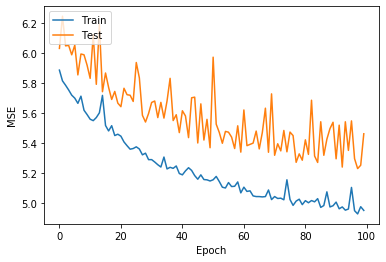

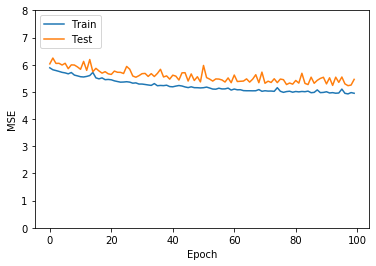

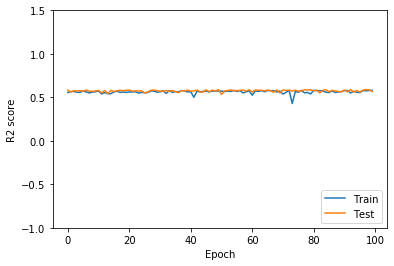

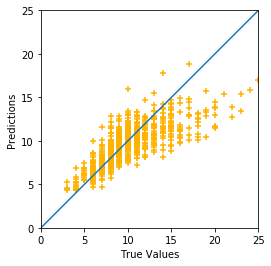

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 2 L2 regularization 0.01

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [44]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

In [45]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [47]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 287us/sample - loss: 86.8355 - mae: 8.5821 - coeff: -7.7038 - val_loss: 54.5926 - val_mae: 6.4168 - val_coeff: -3.9509
Epoch 2/100
3341/3341 [==============================] - 0s 55us/sample - loss: 34.0475 - mae: 4.5695 - coeff: -2.2704 - val_loss: 23.4882 - val_mae: 3.7383 - val_coeff: -1.0104
Epoch 3/100
3341/3341 [==============================] - 0s 55us/sample - loss: 18.4720 - mae: 3.0804 - coeff: -0.7657 - val_loss: 12.3857 - val_mae: 2.4266 - val_coeff: 0.0042
Epoch 4/100
3341/3341 [==============================] - 0s 50us/sample - loss: 10.2537 - mae: 1.9944 - coeff: 0.0967 - val_loss: 8.3486 - val_mae: 1.8243 - val_coeff: 0.3690
Epoch 5/100
3341/3341 [==============================] - 0s 56us/sample - loss: 7.8507 - mae: 1.7442 - coeff: 0.3433 - val_loss: 7.5876 - val_mae: 1.7373 - val_coeff: 0.4331
Epoch 6/100
3341/3341 [==============================] - 0s 53us/sampl

3341/3341 [==============================] - 0s 53us/sample - loss: 4.9418 - mae: 1.4554 - coeff: 0.5907 - val_loss: 5.5187 - val_mae: 1.4930 - val_coeff: 0.5691
Epoch 48/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.8685 - mae: 1.4392 - coeff: 0.5949 - val_loss: 5.3481 - val_mae: 1.4953 - val_coeff: 0.5835
Epoch 49/100
3341/3341 [==============================] - 0s 47us/sample - loss: 4.8481 - mae: 1.4376 - coeff: 0.5946 - val_loss: 5.3588 - val_mae: 1.5010 - val_coeff: 0.5818
Epoch 50/100
3341/3341 [==============================] - 0s 48us/sample - loss: 4.9258 - mae: 1.4576 - coeff: 0.5826 - val_loss: 5.5054 - val_mae: 1.4985 - val_coeff: 0.5689
Epoch 51/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.8623 - mae: 1.4452 - coeff: 0.5799 - val_loss: 5.3570 - val_mae: 1.5155 - val_coeff: 0.5808
Epoch 52/100
3341/3341 [==============================] - 0s 46us/sample - loss: 4.8253 - mae: 1.4358 - coeff: 0.5840 - val_loss: 5.2594 -

3341/3341 [==============================] - 0s 60us/sample - loss: 4.5873 - mae: 1.4269 - coeff: 0.6012 - val_loss: 5.0399 - val_mae: 1.5154 - val_coeff: 0.5903
Epoch 94/100
3341/3341 [==============================] - 0s 65us/sample - loss: 4.5948 - mae: 1.4414 - coeff: 0.5997 - val_loss: 5.3719 - val_mae: 1.4936 - val_coeff: 0.5626
Epoch 95/100
3341/3341 [==============================] - 0s 58us/sample - loss: 4.5660 - mae: 1.4283 - coeff: 0.5782 - val_loss: 5.5034 - val_mae: 1.5110 - val_coeff: 0.5506
Epoch 96/100
3341/3341 [==============================] - 0s 64us/sample - loss: 4.6768 - mae: 1.4520 - coeff: 0.5921 - val_loss: 5.3705 - val_mae: 1.4933 - val_coeff: 0.5628
Epoch 97/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.5385 - mae: 1.4228 - coeff: 0.6044 - val_loss: 5.0989 - val_mae: 1.4910 - val_coeff: 0.5851
Epoch 98/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.5131 - mae: 1.4244 - coeff: 0.5921 - val_loss: 5.1068 -

In [48]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [49]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.736878590937295
RMSE :      2.1764371323190788
r2_score :  0.577880636870347


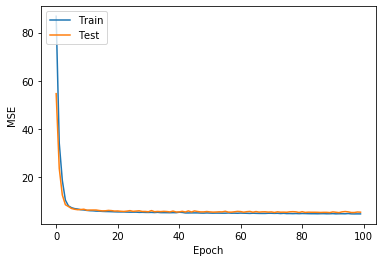

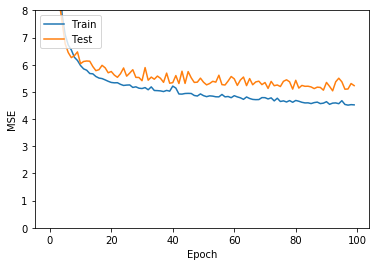

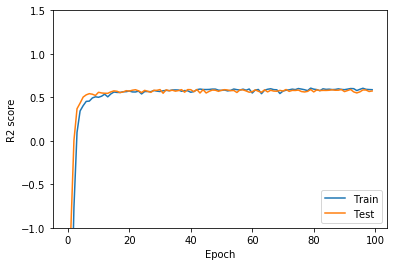

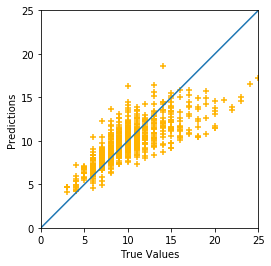

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## model 3 L2 regularization 0.001

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [52]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))

In [53]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [55]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 388us/sample - loss: 85.1955 - mae: 8.5566 - coeff: -7.3977 - val_loss: 53.5473 - val_mae: 6.4657 - val_coeff: -3.9610
Epoch 2/100
3341/3341 [==============================] - 0s 53us/sample - loss: 31.7436 - mae: 4.5622 - coeff: -2.1275 - val_loss: 20.6441 - val_mae: 3.6003 - val_coeff: -0.8493
Epoch 3/100
3341/3341 [==============================] - 0s 50us/sample - loss: 16.4385 - mae: 2.8670 - coeff: -0.6055 - val_loss: 9.4357 - val_mae: 2.2067 - val_coeff: 0.1615
Epoch 4/100
3341/3341 [==============================] - 0s 61us/sample - loss: 8.7369 - mae: 1.9019 - coeff: 0.1393 - val_loss: 5.7284 - val_mae: 1.6921 - val_coeff: 0.4958
Epoch 5/100
3341/3341 [==============================] - 0s 51us/sample - loss: 6.4057 - mae: 1.6489 - coeff: 0.3580 - val_loss: 5.6613 - val_mae: 1.6331 - val_coeff: 0.5022
Epoch 6/100
3341/3341 [==============================] - 0s 56us/sample 

3341/3341 [==============================] - 0s 55us/sample - loss: 4.2755 - mae: 1.4469 - coeff: 0.5952 - val_loss: 4.6013 - val_mae: 1.5041 - val_coeff: 0.5927
Epoch 48/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.2980 - mae: 1.4557 - coeff: 0.5894 - val_loss: 4.6529 - val_mae: 1.4835 - val_coeff: 0.5889
Epoch 49/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.2860 - mae: 1.4601 - coeff: 0.5828 - val_loss: 4.8250 - val_mae: 1.4901 - val_coeff: 0.5740
Epoch 50/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.3142 - mae: 1.4494 - coeff: 0.5871 - val_loss: 4.5894 - val_mae: 1.4891 - val_coeff: 0.5938
Epoch 51/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.2808 - mae: 1.4560 - coeff: 0.5833 - val_loss: 4.7848 - val_mae: 1.4884 - val_coeff: 0.5776
Epoch 52/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.2782 - mae: 1.4483 - coeff: 0.5500 - val_loss: 4.6511 -

Epoch 94/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.2324 - mae: 1.4435 - coeff: 0.5940 - val_loss: 4.6106 - val_mae: 1.5134 - val_coeff: 0.5914
Epoch 95/100
3341/3341 [==============================] - 0s 48us/sample - loss: 4.2418 - mae: 1.4530 - coeff: 0.5920 - val_loss: 4.7932 - val_mae: 1.4906 - val_coeff: 0.5776
Epoch 96/100
3341/3341 [==============================] - 0s 57us/sample - loss: 4.1438 - mae: 1.4347 - coeff: 0.5896 - val_loss: 4.8847 - val_mae: 1.4973 - val_coeff: 0.5702
Epoch 97/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.1077 - mae: 1.4225 - coeff: 0.6029 - val_loss: 5.0730 - val_mae: 1.5079 - val_coeff: 0.5540
Epoch 98/100
3341/3341 [==============================] - 0s 46us/sample - loss: 4.1433 - mae: 1.4215 - coeff: 0.5872 - val_loss: 4.6065 - val_mae: 1.4952 - val_coeff: 0.5925
Epoch 99/100
3341/3341 [==============================] - 0s 40us/sample - loss: 4.1800 - mae: 1.4478 - coeff: 0.5731 - val_l

In [56]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [57]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.887645594400623
RMSE :      2.210802025148481
r2_score :  0.5644452763769058


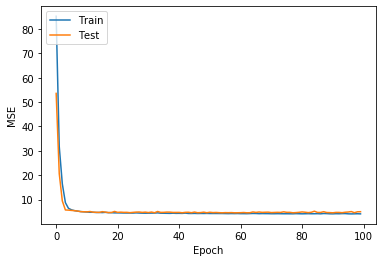

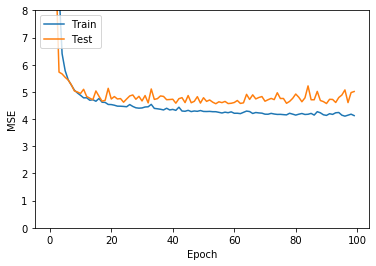

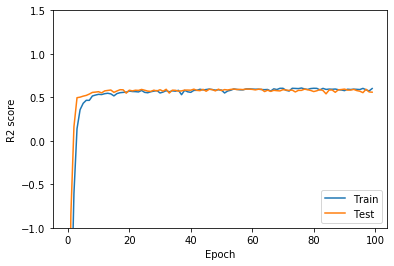

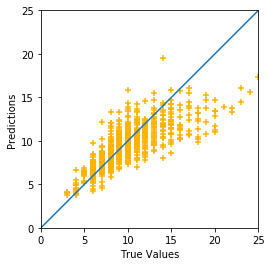

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 4 L2 regularization 0.01 150 epoch

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [60]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

In [61]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [63]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 340us/sample - loss: 78.1044 - mae: 8.0265 - coeff: -6.7331 - val_loss: 39.3540 - val_mae: 5.1673 - val_coeff: -2.5153
Epoch 2/150
3341/3341 [==============================] - 0s 56us/sample - loss: 26.9131 - mae: 3.9132 - coeff: -1.5647 - val_loss: 17.4773 - val_mae: 3.0358 - val_coeff: -0.4536
Epoch 3/150
3341/3341 [==============================] - 0s 67us/sample - loss: 14.1974 - mae: 2.3375 - coeff: -0.3278 - val_loss: 9.6025 - val_mae: 1.9379 - val_coeff: 0.2644
Epoch 4/150
3341/3341 [==============================] - 0s 53us/sample - loss: 9.3367 - mae: 1.8266 - coeff: 0.1773 - val_loss: 7.8084 - val_mae: 1.7672 - val_coeff: 0.4231
Epoch 5/150
3341/3341 [==============================] - 0s 66us/sample - loss: 8.1071 - mae: 1.7070 - coeff: 0.3278 - val_loss: 7.5517 - val_mae: 1.7237 - val_coeff: 0.4428
Epoch 6/150
3341/3341 [==============================] - 0s 52us/sample 

3341/3341 [==============================] - 0s 50us/sample - loss: 5.0479 - mae: 1.4734 - coeff: 0.5716 - val_loss: 5.7103 - val_mae: 1.5123 - val_coeff: 0.5601
Epoch 48/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.9305 - mae: 1.4459 - coeff: 0.5885 - val_loss: 5.4587 - val_mae: 1.4892 - val_coeff: 0.5812
Epoch 49/150
3341/3341 [==============================] - 0s 53us/sample - loss: 4.9355 - mae: 1.4458 - coeff: 0.5848 - val_loss: 5.3765 - val_mae: 1.4929 - val_coeff: 0.5875
Epoch 50/150
3341/3341 [==============================] - 0s 42us/sample - loss: 4.8816 - mae: 1.4340 - coeff: 0.5526 - val_loss: 5.6474 - val_mae: 1.5137 - val_coeff: 0.5630
Epoch 51/150
3341/3341 [==============================] - 0s 45us/sample - loss: 4.9569 - mae: 1.4453 - coeff: 0.5516 - val_loss: 5.3619 - val_mae: 1.4936 - val_coeff: 0.5876
Epoch 52/150
3341/3341 [==============================] - 0s 46us/sample - loss: 4.8898 - mae: 1.4458 - coeff: 0.5871 - val_loss: 5.3428 -

3341/3341 [==============================] - 0s 52us/sample - loss: 4.7275 - mae: 1.4744 - coeff: 0.5810 - val_loss: 5.2997 - val_mae: 1.5021 - val_coeff: 0.5738
Epoch 94/150
3341/3341 [==============================] - 0s 71us/sample - loss: 4.6144 - mae: 1.4344 - coeff: 0.5935 - val_loss: 5.0753 - val_mae: 1.5320 - val_coeff: 0.5914
Epoch 95/150
3341/3341 [==============================] - 0s 51us/sample - loss: 4.7089 - mae: 1.4778 - coeff: 0.5775 - val_loss: 5.4093 - val_mae: 1.5049 - val_coeff: 0.5636
Epoch 96/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.6415 - mae: 1.4594 - coeff: 0.5920 - val_loss: 5.0418 - val_mae: 1.4834 - val_coeff: 0.5951
Epoch 97/150
3341/3341 [==============================] - 0s 50us/sample - loss: 4.6103 - mae: 1.4425 - coeff: 0.5966 - val_loss: 5.0962 - val_mae: 1.5042 - val_coeff: 0.5889
Epoch 98/150
3341/3341 [==============================] - 0s 52us/sample - loss: 4.6332 - mae: 1.4506 - coeff: 0.5782 - val_loss: 5.2342 -

3341/3341 [==============================] - 0s 49us/sample - loss: 4.4766 - mae: 1.4337 - coeff: 0.5969 - val_loss: 5.1463 - val_mae: 1.5458 - val_coeff: 0.5753
Epoch 140/150
3341/3341 [==============================] - 0s 53us/sample - loss: 4.3957 - mae: 1.4163 - coeff: 0.6054 - val_loss: 5.0089 - val_mae: 1.4815 - val_coeff: 0.5888
Epoch 141/150
3341/3341 [==============================] - 0s 54us/sample - loss: 4.3939 - mae: 1.4162 - coeff: 0.5748 - val_loss: 5.2214 - val_mae: 1.5056 - val_coeff: 0.5702
Epoch 142/150
3341/3341 [==============================] - 0s 60us/sample - loss: 4.4130 - mae: 1.4290 - coeff: 0.5967 - val_loss: 5.2841 - val_mae: 1.5144 - val_coeff: 0.5643
Epoch 143/150
3341/3341 [==============================] - 0s 54us/sample - loss: 4.3772 - mae: 1.4154 - coeff: 0.6059 - val_loss: 5.0318 - val_mae: 1.4768 - val_coeff: 0.5859
Epoch 144/150
3341/3341 [==============================] - 0s 55us/sample - loss: 4.3786 - mae: 1.4223 - coeff: 0.6045 - val_loss: 5.3

In [64]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [65]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.5814820780377286
RMSE :      2.1404396926888007
r2_score :  0.59172854869634


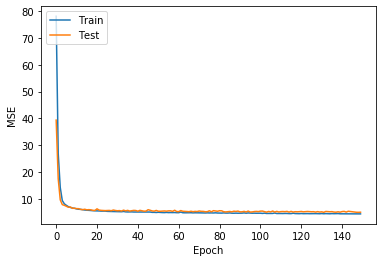

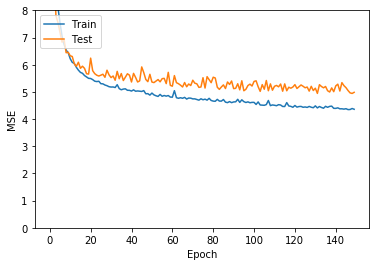

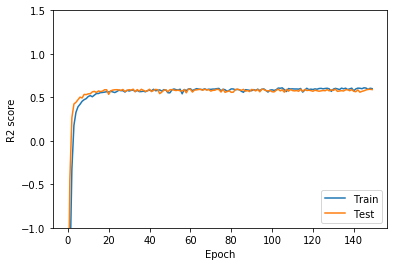

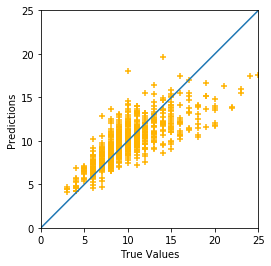

In [66]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## model 5 L2 regularization 0.001  150 epoch

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [68]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))

In [69]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [71]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 267us/sample - loss: 86.6319 - mae: 8.6029 - coeff: -7.7811 - val_loss: 59.2728 - val_mae: 6.7656 - val_coeff: -4.5018
Epoch 2/150
3341/3341 [==============================] - 0s 56us/sample - loss: 35.2489 - mae: 4.8149 - coeff: -2.4271 - val_loss: 22.6075 - val_mae: 3.7257 - val_coeff: -1.0409
Epoch 3/150
3341/3341 [==============================] - 0s 80us/sample - loss: 17.4771 - mae: 3.0362 - coeff: -0.6924 - val_loss: 11.7435 - val_mae: 2.4769 - val_coeff: -0.0570
Epoch 4/150
3341/3341 [==============================] - 0s 54us/sample - loss: 9.9401 - mae: 2.1057 - coeff: -0.0025 - val_loss: 8.1107 - val_mae: 2.0343 - val_coeff: 0.2687
Epoch 5/150
3341/3341 [==============================] - 0s 55us/sample - loss: 7.5872 - mae: 1.8330 - coeff: 0.2667 - val_loss: 7.0933 - val_mae: 1.9022 - val_coeff: 0.3594
Epoch 6/150
3341/3341 [==============================] - 0s 54us/samp

3341/3341 [==============================] - 0s 70us/sample - loss: 4.2664 - mae: 1.4433 - coeff: 0.5885 - val_loss: 4.6649 - val_mae: 1.4745 - val_coeff: 0.5888
Epoch 48/150
3341/3341 [==============================] - 0s 55us/sample - loss: 4.2614 - mae: 1.4430 - coeff: 0.6020 - val_loss: 4.8029 - val_mae: 1.4851 - val_coeff: 0.5772
Epoch 49/150
3341/3341 [==============================] - 0s 62us/sample - loss: 4.3006 - mae: 1.4452 - coeff: 0.5403 - val_loss: 4.8145 - val_mae: 1.5075 - val_coeff: 0.5752
Epoch 50/150
3341/3341 [==============================] - 0s 59us/sample - loss: 4.3067 - mae: 1.4519 - coeff: 0.5673 - val_loss: 4.8032 - val_mae: 1.4820 - val_coeff: 0.5770
Epoch 51/150
3341/3341 [==============================] - 0s 67us/sample - loss: 4.2553 - mae: 1.4381 - coeff: 0.5910 - val_loss: 4.6691 - val_mae: 1.4954 - val_coeff: 0.5877
Epoch 52/150
3341/3341 [==============================] - 0s 71us/sample - loss: 4.2657 - mae: 1.4510 - coeff: 0.5828 - val_loss: 4.6206 -

Epoch 94/150
3341/3341 [==============================] - 0s 53us/sample - loss: 4.0807 - mae: 1.4093 - coeff: 0.5915 - val_loss: 4.6801 - val_mae: 1.4827 - val_coeff: 0.5855
Epoch 95/150
3341/3341 [==============================] - 0s 61us/sample - loss: 4.1421 - mae: 1.4304 - coeff: 0.5871 - val_loss: 4.7036 - val_mae: 1.5186 - val_coeff: 0.5826
Epoch 96/150
3341/3341 [==============================] - 0s 57us/sample - loss: 4.1138 - mae: 1.4256 - coeff: 0.5977 - val_loss: 4.7373 - val_mae: 1.4866 - val_coeff: 0.5809
Epoch 97/150
3341/3341 [==============================] - 0s 53us/sample - loss: 4.0550 - mae: 1.4129 - coeff: 0.6053 - val_loss: 5.2062 - val_mae: 1.5240 - val_coeff: 0.5410
Epoch 98/150
3341/3341 [==============================] - 0s 49us/sample - loss: 4.1357 - mae: 1.4253 - coeff: 0.5876 - val_loss: 4.7904 - val_mae: 1.4889 - val_coeff: 0.5767
Epoch 99/150
3341/3341 [==============================] - 0s 59us/sample - loss: 4.0872 - mae: 1.4114 - coeff: 0.6005 - val_l

3341/3341 [==============================] - 0s 60us/sample - loss: 4.1229 - mae: 1.4158 - coeff: 0.5994 - val_loss: 4.8484 - val_mae: 1.5248 - val_coeff: 0.5714
Epoch 141/150
3341/3341 [==============================] - 0s 84us/sample - loss: 3.9377 - mae: 1.3926 - coeff: 0.6000 - val_loss: 4.7698 - val_mae: 1.4862 - val_coeff: 0.5783
Epoch 142/150
3341/3341 [==============================] - 0s 73us/sample - loss: 3.9595 - mae: 1.3964 - coeff: 0.6265 - val_loss: 4.8072 - val_mae: 1.4880 - val_coeff: 0.5754
Epoch 143/150
3341/3341 [==============================] - 0s 56us/sample - loss: 3.9019 - mae: 1.3855 - coeff: 0.6281 - val_loss: 4.8671 - val_mae: 1.5043 - val_coeff: 0.5699
Epoch 144/150
3341/3341 [==============================] - 0s 70us/sample - loss: 3.8934 - mae: 1.3836 - coeff: 0.6185 - val_loss: 4.8297 - val_mae: 1.4957 - val_coeff: 0.5726
Epoch 145/150
3341/3341 [==============================] - 0s 60us/sample - loss: 3.9095 - mae: 1.3905 - coeff: 0.6117 - val_loss: 4.9

In [72]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [73]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.749399112516796
RMSE :      2.179311614367435
r2_score :  0.5767648906054328


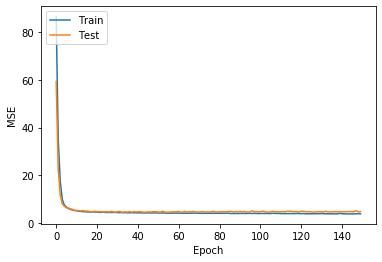

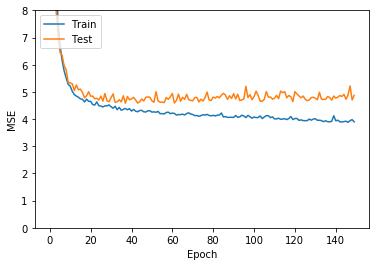

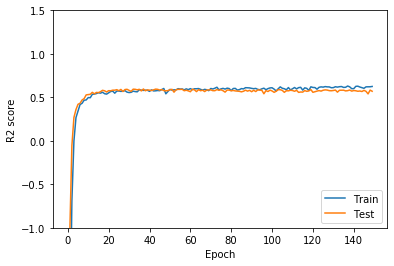

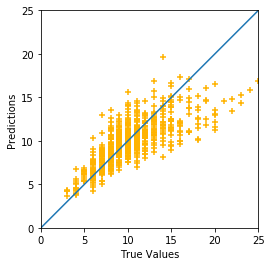

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 6 (test) L2 regularization 0.01 300 epoch

In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [76]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

In [77]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [78]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [80]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 0s 66us/sample - loss: 4.8191 - mae: 1.4489 - coeff: 0.5751 - val_loss: 5.2402 - val_mae: 1.5208 - val_coeff: 0.5860
Epoch 2/300
3341/3341 [==============================] - 0s 93us/sample - loss: 4.8030 - mae: 1.4479 - coeff: 0.5965 - val_loss: 5.2532 - val_mae: 1.5015 - val_coeff: 0.5852
Epoch 3/300
3341/3341 [==============================] - 0s 58us/sample - loss: 4.7476 - mae: 1.4359 - coeff: 0.5822 - val_loss: 5.2731 - val_mae: 1.4920 - val_coeff: 0.5828
Epoch 4/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.7414 - mae: 1.4350 - coeff: 0.5705 - val_loss: 5.2239 - val_mae: 1.4930 - val_coeff: 0.5866
Epoch 5/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.7648 - mae: 1.4439 - coeff: 0.5819 - val_loss: 5.2696 - val_mae: 1.5084 - val_coeff: 0.5838
Epoch 6/300
3341/3341 [==============================] - 0s 57us/sample - loss: 4.7

3341/3341 [==============================] - 0s 71us/sample - loss: 4.5164 - mae: 1.4191 - coeff: 0.5979 - val_loss: 5.2392 - val_mae: 1.4871 - val_coeff: 0.5740
Epoch 48/300
3341/3341 [==============================] - 0s 82us/sample - loss: 4.5139 - mae: 1.4211 - coeff: 0.5930 - val_loss: 5.2808 - val_mae: 1.4964 - val_coeff: 0.5700
Epoch 49/300
3341/3341 [==============================] - 0s 58us/sample - loss: 4.5372 - mae: 1.4256 - coeff: 0.5807 - val_loss: 5.0616 - val_mae: 1.4818 - val_coeff: 0.5885
Epoch 50/300
3341/3341 [==============================] - 0s 59us/sample - loss: 4.5056 - mae: 1.4192 - coeff: 0.6094 - val_loss: 5.0411 - val_mae: 1.4958 - val_coeff: 0.5901
Epoch 51/300
3341/3341 [==============================] - 0s 59us/sample - loss: 4.4854 - mae: 1.4173 - coeff: 0.6013 - val_loss: 5.0868 - val_mae: 1.4804 - val_coeff: 0.5862
Epoch 52/300
3341/3341 [==============================] - 0s 50us/sample - loss: 4.4970 - mae: 1.4158 - coeff: 0.5921 - val_loss: 5.0762 -

Epoch 94/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.3985 - mae: 1.4235 - coeff: 0.5994 - val_loss: 5.0334 - val_mae: 1.4801 - val_coeff: 0.5831
Epoch 95/300
3341/3341 [==============================] - 0s 53us/sample - loss: 4.3629 - mae: 1.4086 - coeff: 0.6047 - val_loss: 4.8946 - val_mae: 1.4946 - val_coeff: 0.5945
Epoch 96/300
3341/3341 [==============================] - 0s 49us/sample - loss: 4.3598 - mae: 1.4088 - coeff: 0.6112 - val_loss: 4.9554 - val_mae: 1.4719 - val_coeff: 0.5895
Epoch 97/300
3341/3341 [==============================] - 0s 60us/sample - loss: 4.3685 - mae: 1.4137 - coeff: 0.6008 - val_loss: 5.0569 - val_mae: 1.4923 - val_coeff: 0.5815
Epoch 98/300
3341/3341 [==============================] - 0s 69us/sample - loss: 4.3705 - mae: 1.4165 - coeff: 0.6056 - val_loss: 5.1368 - val_mae: 1.4982 - val_coeff: 0.5740
Epoch 99/300
3341/3341 [==============================] - 0s 71us/sample - loss: 4.3572 - mae: 1.4132 - coeff: 0.6034 - val_l

3341/3341 [==============================] - 0s 52us/sample - loss: 4.2901 - mae: 1.4101 - coeff: 0.6012 - val_loss: 4.8717 - val_mae: 1.4897 - val_coeff: 0.5922
Epoch 141/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2995 - mae: 1.4168 - coeff: 0.6061 - val_loss: 5.0219 - val_mae: 1.4965 - val_coeff: 0.5793
Epoch 142/300
3341/3341 [==============================] - 0s 54us/sample - loss: 4.3039 - mae: 1.4122 - coeff: 0.6025 - val_loss: 5.1159 - val_mae: 1.4834 - val_coeff: 0.5722
Epoch 143/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2777 - mae: 1.4122 - coeff: 0.6136 - val_loss: 4.9018 - val_mae: 1.4674 - val_coeff: 0.5903
Epoch 144/300
3341/3341 [==============================] - 0s 62us/sample - loss: 4.2519 - mae: 1.4064 - coeff: 0.6133 - val_loss: 5.0131 - val_mae: 1.4764 - val_coeff: 0.5809
Epoch 145/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2634 - mae: 1.4070 - coeff: 0.6039 - val_loss: 4.8

3341/3341 [==============================] - 0s 77us/sample - loss: 4.1793 - mae: 1.3967 - coeff: 0.6016 - val_loss: 4.8221 - val_mae: 1.4818 - val_coeff: 0.5949
Epoch 187/300
3341/3341 [==============================] - 0s 68us/sample - loss: 4.1714 - mae: 1.3981 - coeff: 0.6202 - val_loss: 5.0801 - val_mae: 1.4823 - val_coeff: 0.5733
Epoch 188/300
3341/3341 [==============================] - 0s 70us/sample - loss: 4.1859 - mae: 1.3907 - coeff: 0.6142 - val_loss: 4.7928 - val_mae: 1.4788 - val_coeff: 0.5970
Epoch 189/300
3341/3341 [==============================] - 0s 65us/sample - loss: 4.1920 - mae: 1.3911 - coeff: 0.6124 - val_loss: 4.8531 - val_mae: 1.4615 - val_coeff: 0.5921
Epoch 190/300
3341/3341 [==============================] - 0s 79us/sample - loss: 4.1526 - mae: 1.3947 - coeff: 0.6168 - val_loss: 4.8997 - val_mae: 1.4663 - val_coeff: 0.5880
Epoch 191/300
3341/3341 [==============================] - 0s 63us/sample - loss: 4.1575 - mae: 1.3945 - coeff: 0.6120 - val_loss: 4.8

3341/3341 [==============================] - ETA: 0s - loss: 4.0937 - mae: 1.3942 - coeff: 0.620 - 0s 51us/sample - loss: 4.0909 - mae: 1.3875 - coeff: 0.6243 - val_loss: 4.8282 - val_mae: 1.4653 - val_coeff: 0.5932
Epoch 233/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.1084 - mae: 1.3920 - coeff: 0.6277 - val_loss: 4.8153 - val_mae: 1.4659 - val_coeff: 0.5948
Epoch 234/300
3341/3341 [==============================] - 0s 59us/sample - loss: 4.0844 - mae: 1.3812 - coeff: 0.6255 - val_loss: 4.7829 - val_mae: 1.4835 - val_coeff: 0.5969
Epoch 235/300
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1861 - mae: 1.4009 - coeff: 0.6144 - val_loss: 4.8441 - val_mae: 1.4642 - val_coeff: 0.5913
Epoch 236/300
3341/3341 [==============================] - 0s 67us/sample - loss: 4.0971 - mae: 1.3895 - coeff: 0.6193 - val_loss: 4.8062 - val_mae: 1.4907 - val_coeff: 0.5946
Epoch 237/300
3341/3341 [==============================] - 0s 54us/sample - loss

3341/3341 [==============================] - 0s 63us/sample - loss: 4.0367 - mae: 1.3820 - coeff: 0.6314 - val_loss: 4.9729 - val_mae: 1.4741 - val_coeff: 0.5818
Epoch 279/300
3341/3341 [==============================] - 0s 57us/sample - loss: 4.0697 - mae: 1.3864 - coeff: 0.6251 - val_loss: 4.7876 - val_mae: 1.4663 - val_coeff: 0.5968
Epoch 280/300
3341/3341 [==============================] - 0s 68us/sample - loss: 4.0754 - mae: 1.3788 - coeff: 0.6297 - val_loss: 4.8219 - val_mae: 1.4793 - val_coeff: 0.5937
Epoch 281/300
3341/3341 [==============================] - 0s 67us/sample - loss: 4.0575 - mae: 1.3901 - coeff: 0.6281 - val_loss: 4.8691 - val_mae: 1.4686 - val_coeff: 0.5906
Epoch 282/300
3341/3341 [==============================] - 0s 66us/sample - loss: 4.0472 - mae: 1.3785 - coeff: 0.6359 - val_loss: 4.8346 - val_mae: 1.4713 - val_coeff: 0.5935
Epoch 283/300
3341/3341 [==============================] - 0s 94us/sample - loss: 4.0235 - mae: 1.3794 - coeff: 0.6206 - val_loss: 4.9

In [81]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [82]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.608582234652972
RMSE :      2.146760870393573
r2_score :  0.589313561562613


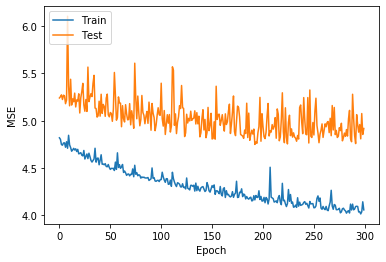

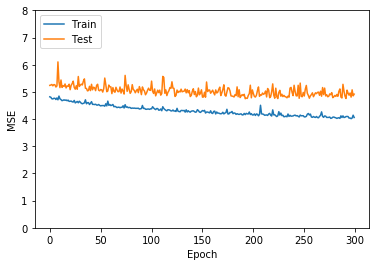

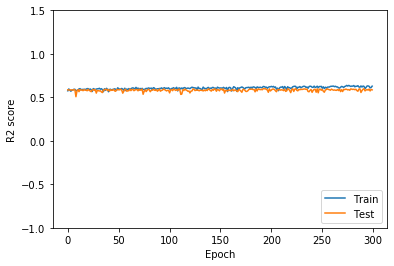

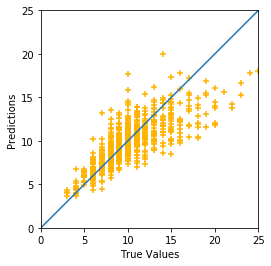

In [83]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 7 L2 regularization 0.005 150 epoch

In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [85]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(10,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(1))

In [86]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_38 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [88]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 339us/sample - loss: 79.6026 - mae: 8.1181 - coeff: -6.7814 - val_loss: 46.7327 - val_mae: 5.8645 - val_coeff: -3.2702
Epoch 2/150
3341/3341 [==============================] - 0s 65us/sample - loss: 28.4698 - mae: 4.1361 - coeff: -1.7357 - val_loss: 16.6013 - val_mae: 3.0878 - val_coeff: -0.4467
Epoch 3/150
3341/3341 [==============================] - 0s 97us/sample - loss: 12.6431 - mae: 2.4409 - coeff: -0.1909 - val_loss: 7.9777 - val_mae: 1.9339 - val_coeff: 0.3439
Epoch 4/150
3341/3341 [==============================] - 0s 73us/sample - loss: 8.3871 - mae: 1.8298 - coeff: 0.2655 - val_loss: 6.9797 - val_mae: 1.8340 - val_coeff: 0.4312
Epoch 5/150
3341/3341 [==============================] - 0s 62us/sample - loss: 7.3945 - mae: 1.7658 - coeff: 0.3419 - val_loss: 7.4006 - val_mae: 1.8144 - val_coeff: 0.3931
Epoch 6/150
3341/3341 [==============================] - 0s 52us/sample 

3341/3341 [==============================] - 0s 59us/sample - loss: 4.6353 - mae: 1.4458 - coeff: 0.5775 - val_loss: 5.3639 - val_mae: 1.5059 - val_coeff: 0.5622
Epoch 48/150
3341/3341 [==============================] - 0s 87us/sample - loss: 4.6752 - mae: 1.4549 - coeff: 0.5747 - val_loss: 5.2030 - val_mae: 1.5396 - val_coeff: 0.5748
Epoch 49/150
3341/3341 [==============================] - 0s 77us/sample - loss: 4.5929 - mae: 1.4436 - coeff: 0.5825 - val_loss: 5.6491 - val_mae: 1.5422 - val_coeff: 0.5363
Epoch 50/150
3341/3341 [==============================] - 0s 62us/sample - loss: 4.5810 - mae: 1.4378 - coeff: 0.6022 - val_loss: 5.2320 - val_mae: 1.5017 - val_coeff: 0.5726
Epoch 51/150
3341/3341 [==============================] - 0s 57us/sample - loss: 4.5798 - mae: 1.4411 - coeff: 0.5934 - val_loss: 5.2874 - val_mae: 1.5015 - val_coeff: 0.5673
Epoch 52/150
3341/3341 [==============================] - 0s 59us/sample - loss: 4.5553 - mae: 1.4318 - coeff: 0.6033 - val_loss: 5.1686 -

Epoch 94/150
3341/3341 [==============================] - 0s 79us/sample - loss: 4.3602 - mae: 1.4190 - coeff: 0.6122 - val_loss: 5.1931 - val_mae: 1.4973 - val_coeff: 0.5676
Epoch 95/150
3341/3341 [==============================] - 0s 58us/sample - loss: 4.3567 - mae: 1.4132 - coeff: 0.6078 - val_loss: 5.1433 - val_mae: 1.5129 - val_coeff: 0.5706
Epoch 96/150
3341/3341 [==============================] - 0s 63us/sample - loss: 4.4008 - mae: 1.4176 - coeff: 0.5708 - val_loss: 5.1414 - val_mae: 1.4907 - val_coeff: 0.5716
Epoch 97/150
3341/3341 [==============================] - 0s 63us/sample - loss: 4.3490 - mae: 1.4098 - coeff: 0.6082 - val_loss: 5.4920 - val_mae: 1.5298 - val_coeff: 0.5408
Epoch 98/150
3341/3341 [==============================] - 0s 78us/sample - loss: 4.3677 - mae: 1.4081 - coeff: 0.6026 - val_loss: 5.0887 - val_mae: 1.4973 - val_coeff: 0.5756
Epoch 99/150
3341/3341 [==============================] - 0s 68us/sample - loss: 4.3642 - mae: 1.4157 - coeff: 0.6031 - val_l

3341/3341 [==============================] - 0s 50us/sample - loss: 4.2635 - mae: 1.4048 - coeff: 0.6139 - val_loss: 4.9176 - val_mae: 1.4758 - val_coeff: 0.5865
Epoch 141/150
3341/3341 [==============================] - 0s 49us/sample - loss: 4.2656 - mae: 1.4070 - coeff: 0.6033 - val_loss: 4.8550 - val_mae: 1.4777 - val_coeff: 0.5910
Epoch 142/150
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2692 - mae: 1.4166 - coeff: 0.6057 - val_loss: 5.3864 - val_mae: 1.5230 - val_coeff: 0.5466
Epoch 143/150
3341/3341 [==============================] - 0s 58us/sample - loss: 4.2835 - mae: 1.4212 - coeff: 0.6039 - val_loss: 5.2130 - val_mae: 1.5213 - val_coeff: 0.5598
Epoch 144/150
3341/3341 [==============================] - 0s 72us/sample - loss: 4.3060 - mae: 1.4200 - coeff: 0.6088 - val_loss: 4.9412 - val_mae: 1.4842 - val_coeff: 0.5839
Epoch 145/150
3341/3341 [==============================] - 0s 71us/sample - loss: 4.2285 - mae: 1.3998 - coeff: 0.6131 - val_loss: 4.8

In [89]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [90]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.49655009730532
RMSE :      2.120507037787265
r2_score :  0.5992971263847562


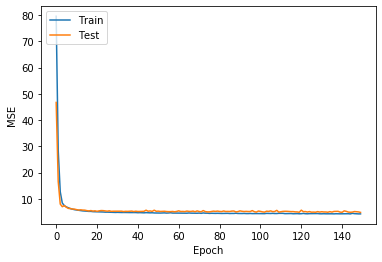

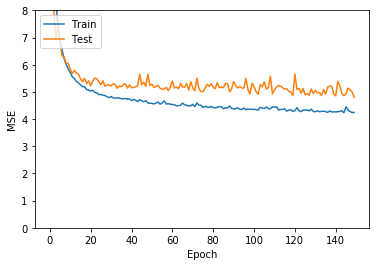

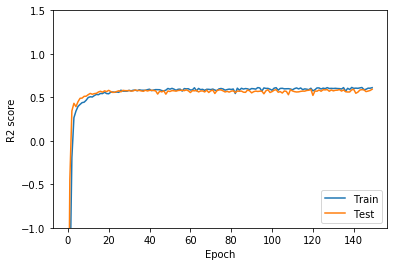

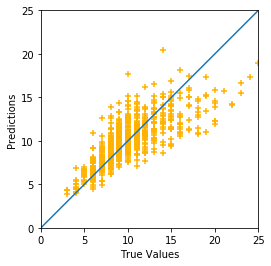

In [91]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 8 L2 regularization 0.005 150 epoch + Dropout

In [100]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [101]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(10,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.25))
model.add(Dense(1))

In [102]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [103]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                352       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [104]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 313us/sample - loss: 72.6282 - mae: 7.6553 - coeff: -6.0825 - val_loss: 37.0630 - val_mae: 5.0553 - val_coeff: -2.3592
Epoch 2/150
3341/3341 [==============================] - 0s 67us/sample - loss: 27.3778 - mae: 4.0111 - coeff: -1.8398 - val_loss: 18.1269 - val_mae: 3.2097 - val_coeff: -0.5884
Epoch 3/150
3341/3341 [==============================] - 0s 54us/sample - loss: 16.5932 - mae: 2.9386 - coeff: -0.6416 - val_loss: 9.6681 - val_mae: 2.1243 - val_coeff: 0.1844
Epoch 4/150
3341/3341 [==============================] - 0s 72us/sample - loss: 14.0884 - mae: 2.4752 - coeff: -0.3866 - val_loss: 9.4285 - val_mae: 2.0601 - val_coeff: 0.2082
Epoch 5/150
3341/3341 [==============================] - 0s 56us/sample - loss: 11.3930 - mae: 2.2604 - coeff: -0.0822 - val_loss: 9.2472 - val_mae: 2.0663 - val_coeff: 0.2268
Epoch 6/150
3341/3341 [==============================] - 0s 60us/sam

3341/3341 [==============================] - 0s 66us/sample - loss: 6.1167 - mae: 1.6958 - coeff: 0.4398 - val_loss: 5.4705 - val_mae: 1.5256 - val_coeff: 0.5499
Epoch 48/150
3341/3341 [==============================] - 0s 86us/sample - loss: 6.0732 - mae: 1.7150 - coeff: 0.4394 - val_loss: 5.7388 - val_mae: 1.5586 - val_coeff: 0.5258
Epoch 49/150
3341/3341 [==============================] - 0s 63us/sample - loss: 5.8699 - mae: 1.6624 - coeff: 0.4685 - val_loss: 5.9173 - val_mae: 1.5930 - val_coeff: 0.5087
Epoch 50/150
3341/3341 [==============================] - 0s 67us/sample - loss: 5.9272 - mae: 1.6679 - coeff: 0.4441 - val_loss: 5.8545 - val_mae: 1.5814 - val_coeff: 0.5144
Epoch 51/150
3341/3341 [==============================] - 0s 57us/sample - loss: 6.0055 - mae: 1.6978 - coeff: 0.4513 - val_loss: 5.5372 - val_mae: 1.5367 - val_coeff: 0.5427
Epoch 52/150
3341/3341 [==============================] - 0s 69us/sample - loss: 5.6097 - mae: 1.6565 - coeff: 0.4930 - val_loss: 5.0845 -

Epoch 94/150
3341/3341 [==============================] - 0s 67us/sample - loss: 5.4244 - mae: 1.6132 - coeff: 0.4829 - val_loss: 5.1618 - val_mae: 1.4946 - val_coeff: 0.5668
Epoch 95/150
3341/3341 [==============================] - 0s 73us/sample - loss: 5.3070 - mae: 1.6135 - coeff: 0.5058 - val_loss: 5.0060 - val_mae: 1.4830 - val_coeff: 0.5801
Epoch 96/150
3341/3341 [==============================] - 0s 73us/sample - loss: 5.3284 - mae: 1.6009 - coeff: 0.5117 - val_loss: 4.9933 - val_mae: 1.4779 - val_coeff: 0.5806
Epoch 97/150
3341/3341 [==============================] - 0s 54us/sample - loss: 5.3752 - mae: 1.6076 - coeff: 0.4992 - val_loss: 5.0835 - val_mae: 1.4883 - val_coeff: 0.5728
Epoch 98/150
3341/3341 [==============================] - 0s 56us/sample - loss: 5.2945 - mae: 1.5957 - coeff: 0.5129 - val_loss: 4.9732 - val_mae: 1.4802 - val_coeff: 0.5823
Epoch 99/150
3341/3341 [==============================] - 0s 59us/sample - loss: 5.5125 - mae: 1.6142 - coeff: 0.4865 - val_l

3341/3341 [==============================] - 0s 68us/sample - loss: 5.0462 - mae: 1.5792 - coeff: 0.5230 - val_loss: 5.0532 - val_mae: 1.4973 - val_coeff: 0.5691
Epoch 141/150
3341/3341 [==============================] - 0s 73us/sample - loss: 5.2269 - mae: 1.6133 - coeff: 0.5037 - val_loss: 5.0081 - val_mae: 1.4821 - val_coeff: 0.5734
Epoch 142/150
3341/3341 [==============================] - 0s 63us/sample - loss: 5.1105 - mae: 1.5840 - coeff: 0.5257 - val_loss: 5.1598 - val_mae: 1.5036 - val_coeff: 0.5599
Epoch 143/150
3341/3341 [==============================] - 0s 57us/sample - loss: 5.0510 - mae: 1.5768 - coeff: 0.5207 - val_loss: 4.9035 - val_mae: 1.4789 - val_coeff: 0.5816
Epoch 144/150
3341/3341 [==============================] - 0s 67us/sample - loss: 4.9190 - mae: 1.5579 - coeff: 0.5191 - val_loss: 4.8545 - val_mae: 1.4789 - val_coeff: 0.5853
Epoch 145/150
3341/3341 [==============================] - 0s 74us/sample - loss: 5.0893 - mae: 1.5869 - coeff: 0.5144 - val_loss: 4.8

In [105]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [106]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.872468851271969
RMSE :      2.2073669498458948
r2_score :  0.5657977275788654


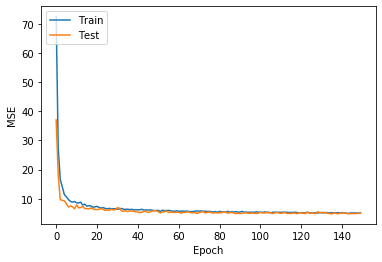

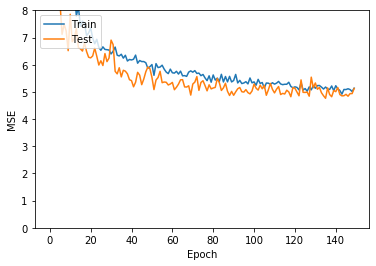

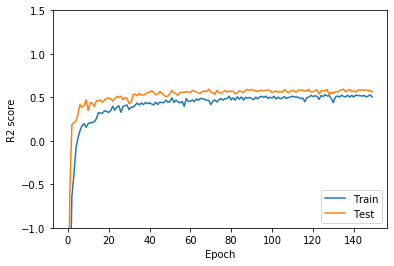

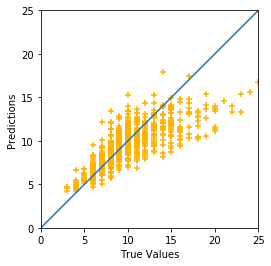

In [107]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 9 L2 regularization 0.005 150 epoch + Dropout 0.1

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

In [109]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(10,)))
model.add(Dropout(0.10))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.10))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.10))
model.add(Dense(1))

In [110]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [111]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                352       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [112]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 324us/sample - loss: 88.7501 - mae: 8.7000 - coeff: -7.8799 - val_loss: 58.4733 - val_mae: 6.6983 - val_coeff: -4.3665
Epoch 2/150
3341/3341 [==============================] - 0s 58us/sample - loss: 34.5930 - mae: 4.6702 - coeff: -2.3217 - val_loss: 21.6693 - val_mae: 3.6237 - val_coeff: -0.9054
Epoch 3/150
3341/3341 [==============================] - 0s 73us/sample - loss: 18.0961 - mae: 3.1205 - coeff: -0.7547 - val_loss: 10.6078 - val_mae: 2.3022 - val_coeff: 0.1034
Epoch 4/150
3341/3341 [==============================] - 0s 65us/sample - loss: 10.9731 - mae: 2.2017 - coeff: -0.0140 - val_loss: 7.2395 - val_mae: 1.7604 - val_coeff: 0.4068
Epoch 5/150
3341/3341 [==============================] - 0s 60us/sample - loss: 8.3589 - mae: 1.9336 - coeff: 0.2278 - val_loss: 6.7758 - val_mae: 1.7196 - val_coeff: 0.4469
Epoch 6/150
3341/3341 [==============================] - 0s 62us/samp

Epoch 94/150
3341/3341 [==============================] - 0s 54us/sample - loss: 4.8815 - mae: 1.5197 - coeff: 0.5460 - val_loss: 4.8627 - val_mae: 1.4668 - val_coeff: 0.5927
Epoch 95/150
3341/3341 [==============================] - 0s 66us/sample - loss: 4.8875 - mae: 1.5179 - coeff: 0.5426 - val_loss: 5.0479 - val_mae: 1.4706 - val_coeff: 0.5765
Epoch 96/150
3341/3341 [==============================] - 0s 61us/sample - loss: 4.9248 - mae: 1.5260 - coeff: 0.5131 - val_loss: 5.0020 - val_mae: 1.4668 - val_coeff: 0.5805
Epoch 97/150
3341/3341 [==============================] - 0s 52us/sample - loss: 4.8017 - mae: 1.5195 - coeff: 0.5421 - val_loss: 5.2903 - val_mae: 1.4973 - val_coeff: 0.5547
Epoch 98/150
3341/3341 [==============================] - 0s 60us/sample - loss: 4.9627 - mae: 1.5297 - coeff: 0.5475 - val_loss: 5.0203 - val_mae: 1.4730 - val_coeff: 0.5781
Epoch 99/150
3341/3341 [==============================] - 0s 54us/sample - loss: 4.8417 - mae: 1.5207 - coeff: 0.5446 - val_l

In [113]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [114]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.533147311360102
RMSE :      2.1291189049369934
r2_score :  0.5960358241595567


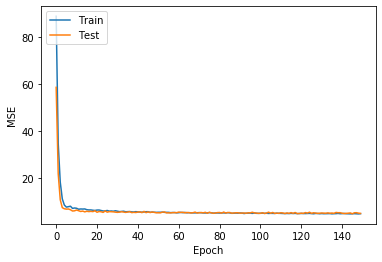

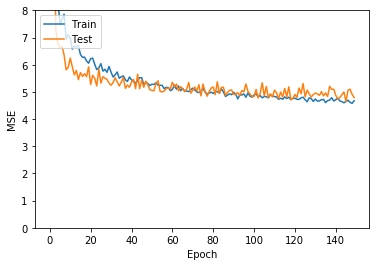

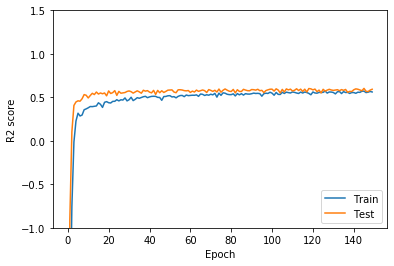

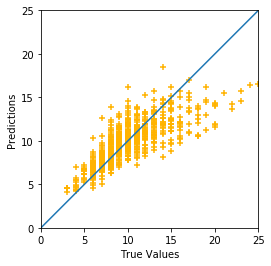

In [115]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model 10 L2 regularization 0.005 150 epoch + Dropout 0.1

In [163]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks as cb

In [172]:
def decay(epoch):
    if epoch < 50:
        return 1e-2
    else:
        return 1e-3
    
class PrintLR(cb.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('\nLearning rate for epoch {} is {}'.format(epoch + 1, model.optimizer.lr.numpy()))


callbacks = [
    cb.LearningRateScheduler(decay),
    PrintLR()
]

In [173]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model.add(Dropout(0.10))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.10))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.10))
model.add(Dense(1))

In [174]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [175]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                352       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)               

In [176]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test], callbacks=callbacks)

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3328/3341 [============================>.] - ETA: 0s - loss: 28.6688 - mae: 3.8463 - coeff: -1.7217 
Learning rate for epoch 1 is 0.009999999776482582
3341/3341 [==============================] - 1s 309us/sample - loss: 28.5802 - mae: 3.8374 - coeff: -1.6419 - val_loss: 8.7775 - val_mae: 1.8767 - val_coeff: 0.3358
Epoch 2/150
2432/3341 [====================>.........] - ETA: 0s - loss: 8.8265 - mae: 1.9856 - coeff: 0.2572
Learning rate for epoch 2 is 0.009999999776482582
3341/3341 [==============================] - 0s 59us/sample - loss: 8.2867 - mae: 1.9184 - coeff: 0.3123 - val_loss: 6.4830 - val_mae: 1.5952 - val_coeff: 0.5227
Epoch 3/150
2944/3341 [=========================>....] - ETA: 0s - loss: 7.0878 - mae: 1.7623 - coeff: 0.4072
Learning rate for epoch 3 is 0.009999999776482582
3341/3341 [==============================] - 0s 65us/sample - loss: 7.0796 - mae: 1.7625 - coeff: 0.4086 - val_loss: 5.8770 - val_mae: 1.6150 -

3328/3341 [============================>.] - ETA: 0s - loss: 5.2979 - mae: 1.6109 - coeff: 0.5041
Learning rate for epoch 26 is 0.009999999776482582
3341/3341 [==============================] - 0s 82us/sample - loss: 5.2863 - mae: 1.6089 - coeff: 0.5063 - val_loss: 4.8342 - val_mae: 1.5075 - val_coeff: 0.5899
Epoch 27/150
2816/3341 [========================>.....] - ETA: 0s - loss: 5.2511 - mae: 1.5908 - coeff: 0.5115
Learning rate for epoch 27 is 0.009999999776482582
3341/3341 [==============================] - 0s 84us/sample - loss: 5.0706 - mae: 1.5624 - coeff: 0.5265 - val_loss: 5.7438 - val_mae: 1.5469 - val_coeff: 0.5128
Epoch 28/150
2944/3341 [=========================>....] - ETA: 0s - loss: 5.2539 - mae: 1.5783 - coeff: 0.5165
Learning rate for epoch 28 is 0.009999999776482582
3341/3341 [==============================] - 0s 98us/sample - loss: 5.1251 - mae: 1.5641 - coeff: 0.5208 - val_loss: 4.9315 - val_mae: 1.5836 - val_coeff: 0.5739
Epoch 29/150
2560/3341 [=================

2944/3341 [=========================>....] - ETA: 0s - loss: 4.9123 - mae: 1.5544 - coeff: 0.5276
Learning rate for epoch 51 is 0.0010000000474974513
3341/3341 [==============================] - 0s 93us/sample - loss: 4.9297 - mae: 1.5469 - coeff: 0.5391 - val_loss: 4.9858 - val_mae: 1.4984 - val_coeff: 0.5719
Epoch 52/150
2816/3341 [========================>.....] - ETA: 0s - loss: 4.7184 - mae: 1.5101 - coeff: 0.5491
Learning rate for epoch 52 is 0.0010000000474974513
3341/3341 [==============================] - 0s 71us/sample - loss: 4.7155 - mae: 1.5020 - coeff: 0.5509 - val_loss: 4.9038 - val_mae: 1.4771 - val_coeff: 0.5794
Epoch 53/150
3200/3341 [===========================>..] - ETA: 0s - loss: 4.7917 - mae: 1.5318 - coeff: 0.5507
Learning rate for epoch 53 is 0.0010000000474974513
3341/3341 [==============================] - 0s 70us/sample - loss: 4.7103 - mae: 1.5201 - coeff: 0.5447 - val_loss: 4.9144 - val_mae: 1.4782 - val_coeff: 0.5789
Epoch 54/150
3200/3341 [==============

2816/3341 [========================>.....] - ETA: 0s - loss: 4.4649 - mae: 1.4693 - coeff: 0.5599
Learning rate for epoch 76 is 0.0010000000474974513
3341/3341 [==============================] - 0s 52us/sample - loss: 4.5985 - mae: 1.4889 - coeff: 0.5595 - val_loss: 4.7329 - val_mae: 1.4679 - val_coeff: 0.5940
Epoch 77/150
2432/3341 [====================>.........] - ETA: 0s - loss: 4.6649 - mae: 1.5093 - coeff: 0.5595
Learning rate for epoch 77 is 0.0010000000474974513
3341/3341 [==============================] - 0s 54us/sample - loss: 4.5526 - mae: 1.4915 - coeff: 0.5742 - val_loss: 4.8786 - val_mae: 1.4714 - val_coeff: 0.5819
Epoch 78/150
2560/3341 [=====================>........] - ETA: 0s - loss: 4.6585 - mae: 1.4916 - coeff: 0.5750
Learning rate for epoch 78 is 0.0010000000474974513
3341/3341 [==============================] - 0s 61us/sample - loss: 4.5193 - mae: 1.4773 - coeff: 0.5777 - val_loss: 4.8036 - val_mae: 1.4684 - val_coeff: 0.5880
Epoch 79/150
3072/3341 [==============

2432/3341 [====================>.........] - ETA: 0s - loss: 4.8777 - mae: 1.5527 - coeff: 0.5590
Learning rate for epoch 101 is 0.0010000000474974513
3341/3341 [==============================] - 0s 59us/sample - loss: 4.6799 - mae: 1.5108 - coeff: 0.5572 - val_loss: 5.1214 - val_mae: 1.4933 - val_coeff: 0.5613
Epoch 102/150
2816/3341 [========================>.....] - ETA: 0s - loss: 4.4981 - mae: 1.4715 - coeff: 0.5775
Learning rate for epoch 102 is 0.0010000000474974513
3341/3341 [==============================] - 0s 75us/sample - loss: 4.5225 - mae: 1.4711 - coeff: 0.5684 - val_loss: 4.8914 - val_mae: 1.4731 - val_coeff: 0.5805
Epoch 103/150
2944/3341 [=========================>....] - ETA: 0s - loss: 4.5663 - mae: 1.4896 - coeff: 0.5750
Learning rate for epoch 103 is 0.0010000000474974513
3341/3341 [==============================] - 0s 101us/sample - loss: 4.5162 - mae: 1.4845 - coeff: 0.5677 - val_loss: 4.9726 - val_mae: 1.4784 - val_coeff: 0.5740
Epoch 104/150
3200/3341 [=======

2944/3341 [=========================>....] - ETA: 0s - loss: 4.4405 - mae: 1.4639 - coeff: 0.5733
Learning rate for epoch 126 is 0.0010000000474974513
3341/3341 [==============================] - 0s 132us/sample - loss: 4.4331 - mae: 1.4595 - coeff: 0.5766 - val_loss: 4.8198 - val_mae: 1.4676 - val_coeff: 0.5872
Epoch 127/150
3328/3341 [============================>.] - ETA: 0s - loss: 4.4326 - mae: 1.4732 - coeff: 0.5815
Learning rate for epoch 127 is 0.0010000000474974513
3341/3341 [==============================] - 0s 112us/sample - loss: 4.4279 - mae: 1.4729 - coeff: 0.5851 - val_loss: 4.8163 - val_mae: 1.4658 - val_coeff: 0.5872
Epoch 128/150
2560/3341 [=====================>........] - ETA: 0s - loss: 4.5127 - mae: 1.4685 - coeff: 0.5707
Learning rate for epoch 128 is 0.0010000000474974513
3341/3341 [==============================] - 0s 81us/sample - loss: 4.5070 - mae: 1.4731 - coeff: 0.5705 - val_loss: 4.7268 - val_mae: 1.4702 - val_coeff: 0.5946
Epoch 129/150
3328/3341 [======

In [177]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [178]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.59662226231914
RMSE :      2.143973475190199
r2_score :  0.5903793553776084


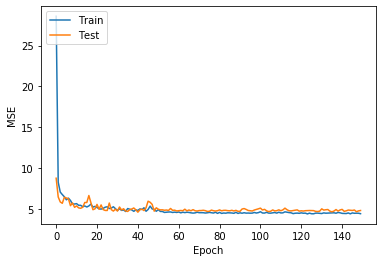

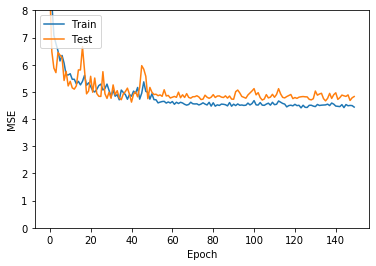

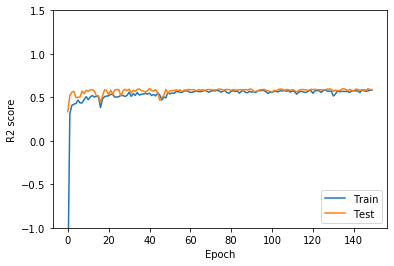

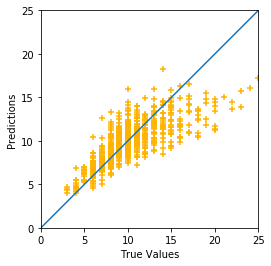

In [179]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model _ other

In [180]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks as cb

In [181]:
def decay(epoch):
    if epoch < 50:
        return 1e-2
    else:
        return 1e-3
    
class PrintLR(cb.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('\nLearning rate for epoch {} is {}'.format(epoch + 1, model.optimizer.lr.numpy()))


callbacks = [
    cb.LearningRateScheduler(decay),
    PrintLR()
]

In [182]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

In [183]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [184]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [185]:
epochs = 150
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])#, callbacks=callbacks)

Train on 3341 samples, validate on 836 samples
Epoch 1/150
3341/3341 [==============================] - 1s 417us/sample - loss: 121.8921 - mae: 10.5062 - coeff: -11.1271 - val_loss: 121.9636 - val_mae: 10.4636 - val_coeff: -10.3168
Epoch 2/150
3341/3341 [==============================] - 0s 59us/sample - loss: 113.8036 - mae: 10.1327 - coeff: -10.5311 - val_loss: 114.7644 - val_mae: 10.1372 - val_coeff: -9.6484
Epoch 3/150
3341/3341 [==============================] - 0s 74us/sample - loss: 106.9629 - mae: 9.8149 - coeff: -9.5790 - val_loss: 107.8457 - val_mae: 9.8223 - val_coeff: -9.0073
Epoch 4/150
3341/3341 [==============================] - 0s 60us/sample - loss: 99.7063 - mae: 9.4692 - coeff: -9.0523 - val_loss: 100.1178 - val_mae: 9.4549 - val_coeff: -8.2908
Epoch 5/150
3341/3341 [==============================] - 0s 85us/sample - loss: 91.1498 - mae: 9.0376 - coeff: -8.1369 - val_loss: 90.2633 - val_mae: 8.9536 - val_coeff: -7.3725
Epoch 6/150
3341/3341 [=========================

3341/3341 [==============================] - 0s 45us/sample - loss: 5.5967 - mae: 1.6530 - coeff: 0.4730 - val_loss: 6.0885 - val_mae: 1.6888 - val_coeff: 0.4777
Epoch 48/150
3341/3341 [==============================] - 0s 42us/sample - loss: 5.5579 - mae: 1.6455 - coeff: 0.4784 - val_loss: 6.0449 - val_mae: 1.6829 - val_coeff: 0.4814
Epoch 49/150
3341/3341 [==============================] - 0s 41us/sample - loss: 5.5254 - mae: 1.6478 - coeff: 0.4849 - val_loss: 5.9814 - val_mae: 1.6778 - val_coeff: 0.4868
Epoch 50/150
3341/3341 [==============================] - 0s 50us/sample - loss: 5.4874 - mae: 1.6362 - coeff: 0.4792 - val_loss: 5.9481 - val_mae: 1.6709 - val_coeff: 0.4896
Epoch 51/150
3341/3341 [==============================] - 0s 57us/sample - loss: 5.4702 - mae: 1.6504 - coeff: 0.4759 - val_loss: 5.8854 - val_mae: 1.6700 - val_coeff: 0.4950
Epoch 52/150
3341/3341 [==============================] - 0s 45us/sample - loss: 5.4346 - mae: 1.6389 - coeff: 0.4777 - val_loss: 5.8745 -

Epoch 94/150
3341/3341 [==============================] - 0s 51us/sample - loss: 4.8812 - mae: 1.5462 - coeff: 0.5346 - val_loss: 5.1804 - val_mae: 1.5615 - val_coeff: 0.5556
Epoch 95/150
3341/3341 [==============================] - 0s 46us/sample - loss: 4.8746 - mae: 1.5378 - coeff: 0.5519 - val_loss: 5.1639 - val_mae: 1.5634 - val_coeff: 0.5570
Epoch 96/150
3341/3341 [==============================] - 0s 54us/sample - loss: 4.8676 - mae: 1.5405 - coeff: 0.5461 - val_loss: 5.1340 - val_mae: 1.5615 - val_coeff: 0.5595
Epoch 97/150
3341/3341 [==============================] - 0s 48us/sample - loss: 4.8574 - mae: 1.5420 - coeff: 0.5414 - val_loss: 5.1730 - val_mae: 1.5593 - val_coeff: 0.5562
Epoch 98/150
3341/3341 [==============================] - 0s 57us/sample - loss: 4.8548 - mae: 1.5366 - coeff: 0.5459 - val_loss: 5.1394 - val_mae: 1.5573 - val_coeff: 0.5590
Epoch 99/150
3341/3341 [==============================] - 0s 57us/sample - loss: 4.8495 - mae: 1.5267 - coeff: 0.5400 - val_l

3341/3341 [==============================] - 0s 56us/sample - loss: 4.6716 - mae: 1.4999 - coeff: 0.5624 - val_loss: 4.9737 - val_mae: 1.5326 - val_coeff: 0.5735
Epoch 141/150
3341/3341 [==============================] - 0s 51us/sample - loss: 4.6616 - mae: 1.4960 - coeff: 0.5694 - val_loss: 4.9700 - val_mae: 1.5300 - val_coeff: 0.5738
Epoch 142/150
3341/3341 [==============================] - 0s 48us/sample - loss: 4.6553 - mae: 1.5001 - coeff: 0.5503 - val_loss: 5.0551 - val_mae: 1.5312 - val_coeff: 0.5665
Epoch 143/150
3341/3341 [==============================] - 0s 51us/sample - loss: 4.6592 - mae: 1.4976 - coeff: 0.5603 - val_loss: 5.0206 - val_mae: 1.5291 - val_coeff: 0.5696
Epoch 144/150
3341/3341 [==============================] - 0s 72us/sample - loss: 4.6492 - mae: 1.5093 - coeff: 0.5613 - val_loss: 5.0213 - val_mae: 1.5257 - val_coeff: 0.5693
Epoch 145/150
3341/3341 [==============================] - 0s 92us/sample - loss: 4.6570 - mae: 1.4872 - coeff: 0.5607 - val_loss: 4.9

In [186]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [187]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.723378630830494
RMSE :      2.173333529587784
r2_score :  0.5790836642338646


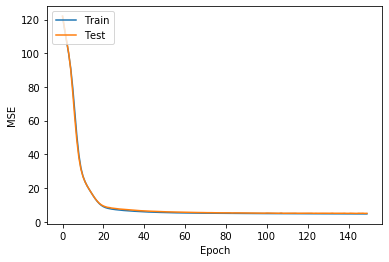

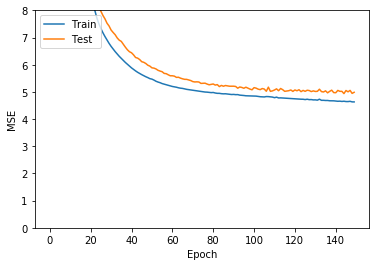

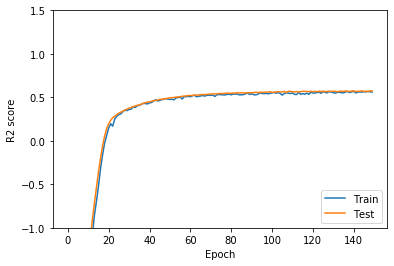

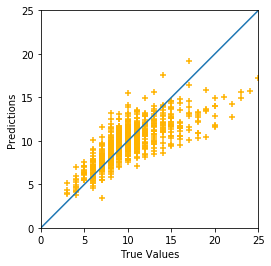

In [188]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)